<a href="https://colab.research.google.com/github/volgasezen/is584/blob/main/Lab 4/Word Embeddings Skipgram exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Now you try!

Implement a skip-gram model by modifying the CBOW implementation we have studied before. 
As a reminder, skip-gram models take one input and give neighboring words. You also need to change/find an appropriate loss function. PyTorch's [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions) page can help here. Also, do not forget to change the training loop accordingly. 

Quick tips:
* Utilize Cross entropy loss or Log SoftMax loss functions.
* Do not forget to change the data dimensions for your network. You can user [.view()](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) or [torch.reshape()](https://pytorch.org/docs/stable/generated/torch.reshape.html) 

At the end of the experiment, you are required to observe the embeddings of study-learn and idea-way word pairs. You are expected to reach 95% cosine similarity with one of the word pairs, while observing the cosine similarity of other word pair increasing with each epoch.

In [ ]:
import torch
import torch.nn as nn
print(torch.__version__)

1.12.1+cu113


You are required to fill the necessary functions to implement the ski-gram model.

Let's start with importing necessary libraries(again).


In [ ]:
import torch
import torch.nn as nn
print(torch.__version__)

1.12.1+cu113


Reminder for skipgram

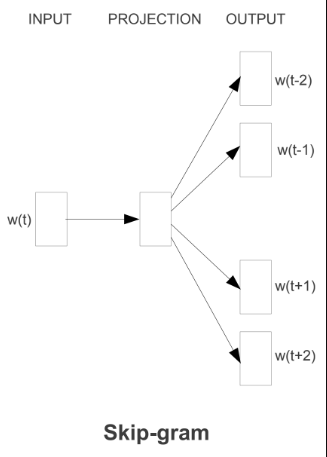

In [ ]:
raw_text = """We are about to study the idea of a computational process.
              We are about to learn the idea of a computational process.
              We are about to study the way of a computational process.
              We are about to learn the way of a computational process.""".split()

Let's prepare the input and output vectors for training. We will calculate the vocabulary size.

In [ ]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right

data = []
for i in range(CONTEXT_SIZE, len(raw_text) - CONTEXT_SIZE):
    context =
    target = 
    data.append((context, target))

print(data[:10])

[('about', ['We', 'are', 'to', 'study']), ('to', ['are', 'about', 'study', 'the']), ('study', ['about', 'to', 'the', 'idea']), ('the', ['to', 'study', 'idea', 'of']), ('idea', ['study', 'the', 'of', 'a']), ('of', ['the', 'idea', 'a', 'computational']), ('a', ['idea', 'of', 'computational', 'process.']), ('computational', ['of', 'a', 'process.', 'We']), ('process.', ['a', 'computational', 'We', 'are']), ('We', ['computational', 'process.', 'are', 'about'])]


In [ ]:
vocab = set(raw_text)
vocab_size = len(vocab)
print(vocab_size)

13


In [ ]:
word_to_ix = {word: i for i, word in enumerate(vocab)}  # a dictionary that is similar to torchtext's stoi function
ix_to_word = {ix:word for ix, word in enumerate(vocab)} # a dictionary that is similar to torchtext's itos function

print('word to ix converts word to numbers: word_to_ix["We"] ->', word_to_ix["We"])
print("ix to word converts word to numbers: ix_to_word[11] ->", ix_to_word[11])

word to ix converts word to numbers: word_to_ix["We"] -> 11
ix to word converts word to numbers: ix_to_word[11] -> We


In [ ]:
def make_context_vector(context, word_to_ix):  # function to convert our word array to  torch tensor
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

print("Make context vector function convert our data set to tensors:\n", data[0][1],"->", make_context_vector(data[0][1], word_to_ix))
print("\nFor target we can still use: \nword_to_ix[data[0][1]]->",word_to_ix[data[0][0]])

Make context vector function convert our data set to tensors:
 ['We', 'are', 'to', 'study'] -> tensor([11, 10, 12,  4])

For target we can still use: 
word_to_ix[data[0][1]]-> 0


You are required to create the network below: A model with 2 layers and an embedding layer. Fill the below function accordingly.


In [ ]:
class network(nn.Module):

    def __init__(self, vocab_size, embedding_dim,hidden_dim):  
        super(network, self).__init__()
            self.embeddings = #create a model with 2 layers and an embedding layer
        

    def forward(self, inputs):

        return x
        
    def get_word_embedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        return self.embeddings(word).view(1,-1)

In [ ]:
EMBEDDING_DIM = 2 
HIDDEN_DIM = 5

model = network(len(vocab), EMBEDDING_DIM,HIDDEN_DIM)   

model

CBOWnetwork(
  (embeddings): Embedding(13, 3)
  (linear1): Linear(in_features=3, out_features=10, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=10, out_features=52, bias=True)
  (softmax): LogSoftmax(dim=1)
)

Write down the optimizer and loss function you will be using for training your network.

In [ ]:
# Fill parameters according to your model
optimizer = 
loss_function =   

Write down the necessary codes for training your network below.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
losses = []   # for keeping the losses
EPOCHS = 1601  # lower learning rate and small data

j=0
for epoch in range(EPOCHS):    
    total_loss = 0
    i=0 
    for context, target in data:     #lets get our context and target
        
        # Remove the gradients for next iteration 
       
        # forward pass

        # calculate the Loss
        loss =

        # backward Pass

        # Gradient decent using optimizer 

        # 
        total_loss += loss.item()
        i +=1
    if j%100 ==0:
      print(f'epoch  {j}  avarage loss  {(total_loss/i):0}')
      model.eval()
      with torch.no_grad():
        print("study:", model.get_word_embedding('study').detach().numpy(),"learn:", model.get_word_embedding('learn').detach().numpy())
        print('cosine_similarity is ->' + str(cosine_similarity(model.get_word_embedding('study').detach().numpy() ,model.get_word_embedding('learn').detach().numpy() )))
        print("idea:", str(model.get_word_embedding('idea').detach().numpy()),"way:", model.get_word_embedding('way').detach().numpy())
        print('cosine_similarity is ->' + str(cosine_similarity(model.get_word_embedding('idea').detach().numpy() ,model.get_word_embedding('way').detach().numpy() )), '\n')
      model.train()
    losses.append(total_loss)
    j += 1

epoch  0  avarage loss  0.21293779010884464
study: [[-0.2535174 -1.6105576  0.8534502]] learn: [[ 1.0816721  -1.3381094  -0.20064513]]
cosine_similarity[[0.5362987]]
idea: [[ 0.31931025  1.4306628  -1.0289829 ]] way: [[ 0.10452295  2.0273862  -0.7759744 ]]
cosine_similarity[[0.9588907]] 

epoch  100  avarage loss  0.19889857894740998
study: [[-0.24950255 -1.624092    0.86536855]] learn: [[ 1.0974569  -1.3699363  -0.16681112]]
cosine_similarity[[0.5517628]]
idea: [[ 0.32007405  1.439333   -1.0347471 ]] way: [[ 0.1029678  2.031888  -0.7857338]]
cosine_similarity[[0.95976216]] 

epoch  200  avarage loss  0.18868879289366305
study: [[-0.24577177 -1.6362417   0.87476146]] learn: [[ 1.110665  -1.3983276 -0.1371016]]
cosine_similarity[[0.56535614]]
idea: [[ 0.3208956  1.4471033 -1.0400101]] way: [[ 0.10154499  2.035952   -0.7943189 ]]
cosine_similarity[[0.96048766]] 

epoch  300  avarage loss  0.18116832030937075
study: [[-0.24238639 -1.6471918   0.88236004]] learn: [[ 1.1218145  -1.4235928  

At the end, you are expected to see an similar output as follows:

epoch  1600  avarage loss  0.1529840423958376
study: [[-0.22306311 -1.7350982   0.9242201 ]] learn: [[ 1.1902273  -1.6019659   0.07122486]]
cosine_similarity[[0.65295964]]
idea: [[ 0.3322212  1.511861  -1.0832094]] way: [[ 0.09471406  2.0700963  -0.85477495]]
cosine_similarity[[0.9650448]] 

Please note that the embeddings of words can change due to random initialization.